In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


In [3]:
from fastbook import *
from fastai.vision.widgets import *
from duckduckgo_search import DDGS

In [29]:
from bing_image_downloader import downloader
from fastai.vision.all import *

# Création du dossier principal
bear_types = ['grizzly bear', 'black bear', 'teddy bear']

for bear in bear_types:
    print(f'Téléchargement de {bear}...')
    downloader.download(f"{bear}",limit = 200, output_dir = 'bears_images',force_replace=False,timeout = 60, verbose = False)

print("Téléchargement terminé.")

Téléchargement de grizzly bear...
[%] Downloading Images to /Users/sachadegoix/Documents/github-repositories/fastbook/bears_images/grizzly bear
[!] Issue getting: https://denverzoo.org/wp-content/uploads/2018/09/Grizzly-Bear_03.jpg
[!] Error:: HTTP Error 403: Forbidden
[!] Issue getting: https://zoosauvage.org/app/uploads/2017/11/ours-grizzli-1.jpg
[!] Error:: HTTP Error 404: Not Found
[!] Issue getting: https://www.tmurphywild.com/wp-content/uploads/2022/04/GrizzlyCubs_15620.jpg
[!] Error:: HTTP Error 403: Forbidden
[!] Issue getting: https://grizzlybearwatching.com/wp-content/uploads/2014/11/triplets-1.jpg
[!] Error:: <urlopen error timed out>
[!] Issue getting: http://mcgregorriveroutfitters.com/wp-content/uploads/2016/09/grizzlygallery7.jpg
[!] Error:: Remote end closed connection without response
[!] Issue getting: https://mcgregorriveroutfitters.com/wp-content/uploads/2016/09/grizzlygallery3.jpg
[!] Error:: Remote end closed connection without response
[!] Issue getting: https://

KeyboardInterrupt: 

In [ ]:
# On récupère tous les chemins de fichiers (remplace 'ims' dans le notebook original)
path = Path('bears')
fns = get_image_files(path)

print(f'{len(fns)} images téléchargées.')

90 images téléchargées.


In [22]:
failed = verify_images(fns)
print(f'{len(failed)} images corrompues supprimées.')
failed.map(Path.unlink);

/opt/anaconda3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=12751) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/opt/anaconda3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=12751) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/opt/anaconda3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=12751) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/opt/anaconda3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=12751) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/opt/anaconda3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=12751) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fo

0 images corrompues supprimées.


## Turn the data into a DataLoaders object (fast.ai library)

In [ ]:
# Creation of a DataBlock (step before creating DataLoaders)

bears = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms=Resize(128)
)

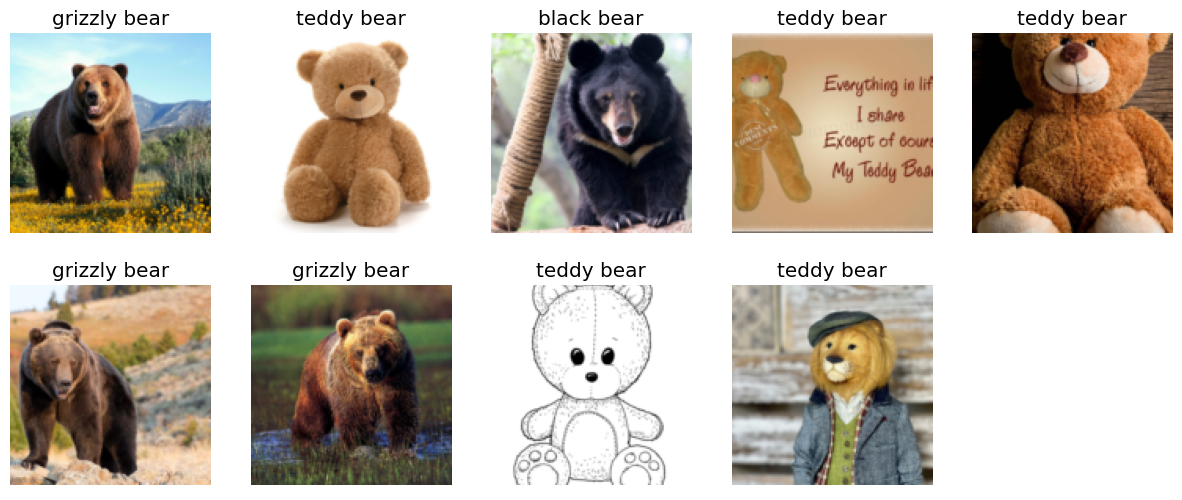

In [ ]:
# Creation of DataLoaders
dls = bears.dataloaders(path)

# Visualisation d'un batch
dls.valid.show_batch(max_n=9, nrows=2)

## Data Augmentation

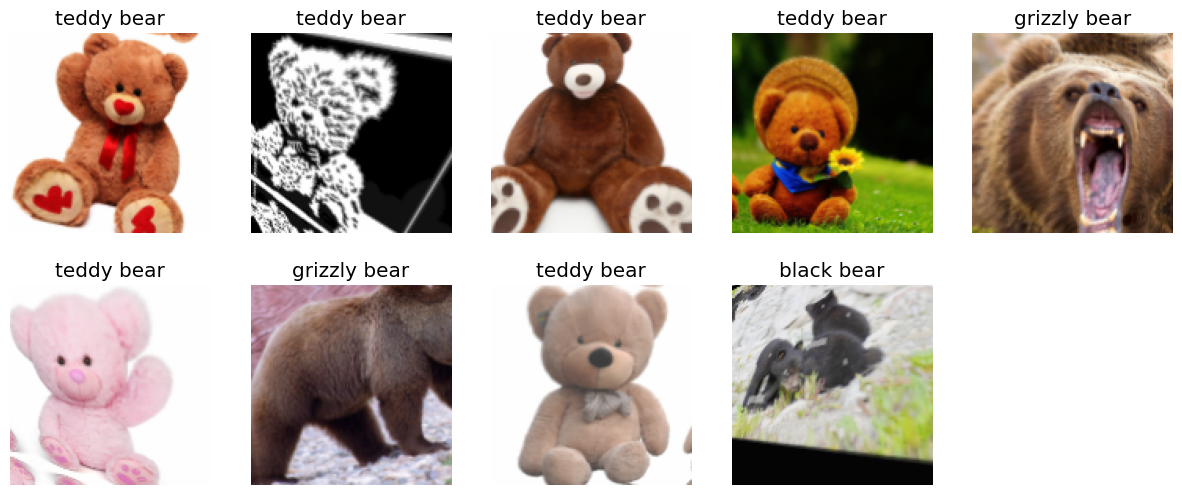

In [27]:
bears = bears.new(item_tfms=Resize(128),batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=9, nrows=2)

## Training 

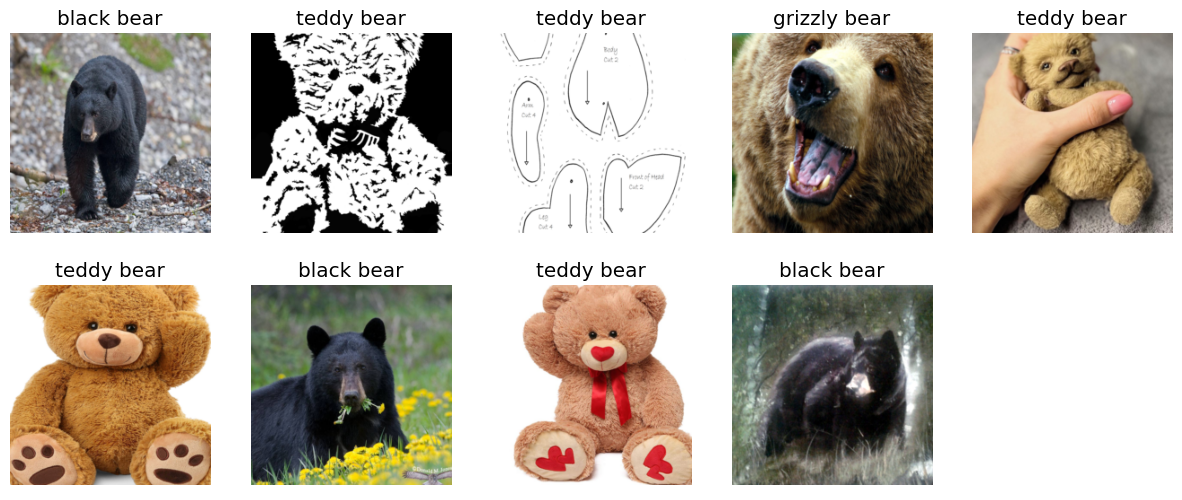

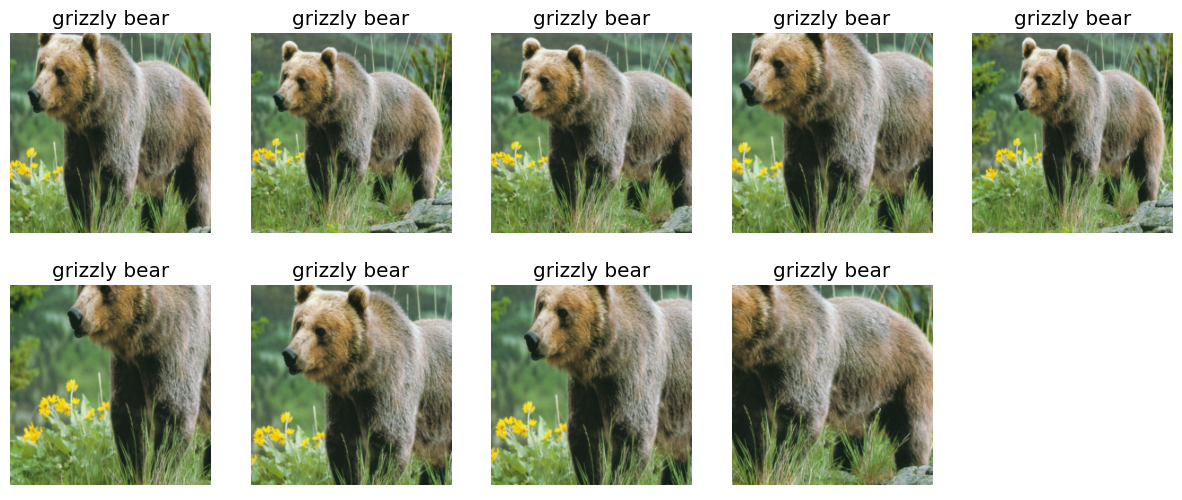

In [34]:
bears = bears.new(item_tfms=RandomResizedCrop(224, min_scale=0.35))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=9, nrows=2)
dls.train.show_batch(max_n=9, nrows=2,unique = True) #We see the transformation of one image

In [37]:
# Creation of the learner 
# We use Transfer Learning with the pre-trained 'resnet18' model
# The metric is error_rate (1 - accuracy)
learn = vision_learner(dls, resnet18, metrics=error_rate)

# On a pas besoin de train car on utilise un modèle pré-entrainé, on peaufine avec fine_tune
# On fait 4 epochs
learn.fine_tune(5)

### Confusion matrix

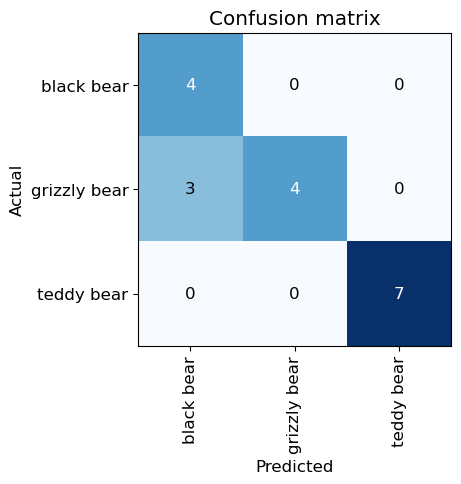

In [38]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

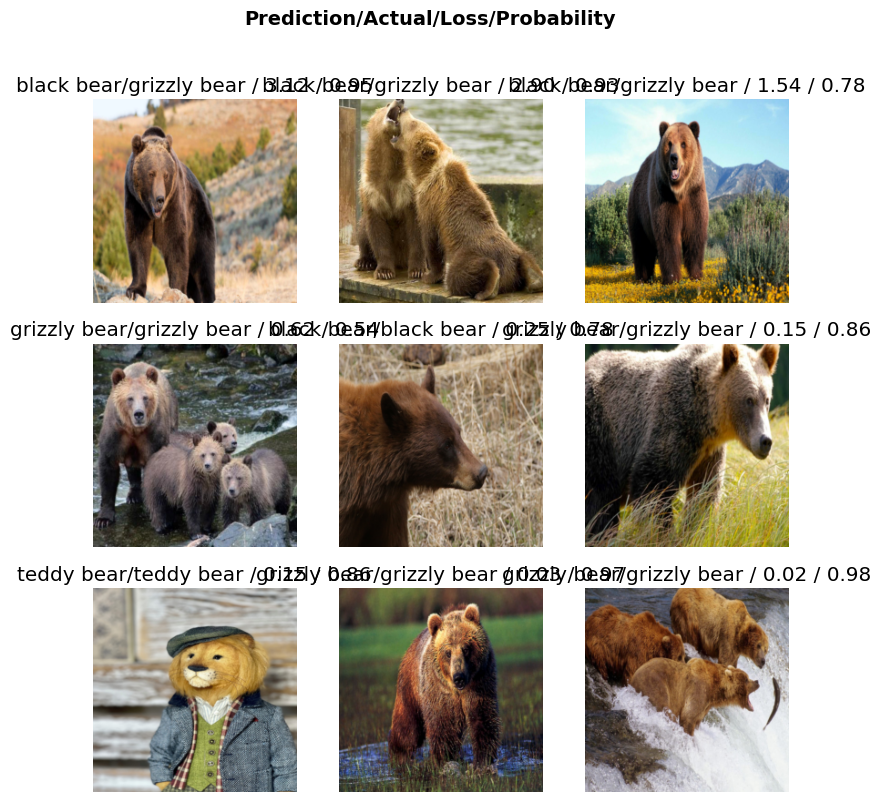

In [39]:
# Images with the highest losses
interp.plot_top_losses(9, nrows=3)